
Highest number of likes in a tweet : 5
Average number of likes in all the tweets : 0.3258426966292135
Highest number of retweets in a tweet: 499
Average number of retweets in all the tweets : 18.921348314606742

 Creation of content sources:
*Twitter for Android 17.97752808988764%
*CgAn Raven 1.1235955056179776%
*RoundTeam 1.1235955056179776%
*Twitter for iPhone 16.853932584269664%
*JamieForTrump 2.247191011235955%
*Twitter Lite 5.617977528089887%
*Tweet Old Post 1.1235955056179776%
*Twitter Web Client 22.47191011235955%
*STOP Imperialism 2.247191011235955%
*SocialOomph 1.1235955056179776%
*Repostingmachine 4.49438202247191%
*ManageFlitter 1.1235955056179776%
*Buffer 2.247191011235955%
*Total Disaster 1.1235955056179776%
*Twitterrific for Mac 1.1235955056179776%
*Trendster Mag 1.1235955056179776%
*Twitlonger 1.1235955056179776%
*rankstr.com 2.247191011235955%
*Royal Seal Ent 1.1235955056179776%
*Twitter for iPad 3.3707865168539324%
*Etsy 3.3707865168539324%
*Google 1.1235955056179776%

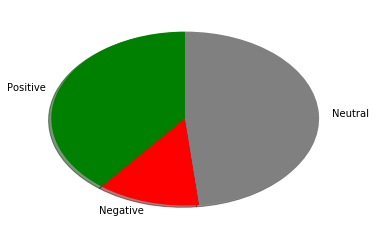

In [1]:
import tweepy           
import pandas as pd    
import numpy as np     
import csv


from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from credentials import *

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
# Return API with authentication:
api = tweepy.API(auth,wait_on_rate_limit=True)


# Query
subject = input('Enter subject of interest: ')
number = input('Enter number of tweets: ')

# We create an extractor object:
tweets = []
for tweet in tweepy.Cursor(api.search, q='%23'+str(subject),since='2018-01-01',lang='en').items(int(number)):  # used for a specific hashtag
    tweets.append(tweet)

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We add relevant data:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

from datetime import datetime
data["time"] = [d.time() for d in data["Date"]]

# We extract the tweet with more FAVs and more Retweet:

like_max = np.max(data['Likes'])
like_mean = np.mean(data['Likes'])

rt_max  = np.max(data['RTs'])
rt_mean = np.mean(data['RTs'])

# Max FAVs:
print("\nHighest number of likes in a tweet : {}".format(like_max))
print("Average number of likes in all the tweets : {}".format(like_mean))

# Max RTs:
print("Highest number of retweets in a tweet: {}".format(rt_max))
print("Average number of retweets in all the tweets : {}".format(rt_mean))

# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We create a numpy vector mapped to labels:
count = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            count[index] += 1
            pass
        
count /= len(data['Source'])

# We print sources list:
i=0
print("\n Creation of content sources:")
for i in range(len(count)):
    print("*" + sources[i] + " " + str(count[i]*100) + "%")
    i+=1
    
    
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"
    

# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
    
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == "positive"]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == "neutral"]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == "negative"]

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [len(pos_tweets), len(neg_tweets), len(neu_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

# Plotting

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)
plt.show()


## export csv
file = data[['Tweets','SA']]
file.to_csv('Analysis of {} tweets for {}.csv'.format(number,subject))
